In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/thilak/PythonFiles/Crop price/DATA SET/MAINDATA.csv')
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22/05/19
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22/05/19
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22/05/19
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22/05/19
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22/05/19


In [3]:
df.shape

(860070, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860070 entries, 0 to 860069
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  860070 non-null  object 
 1   state           860070 non-null  object 
 2   district        860070 non-null  object 
 3   market          860070 non-null  object 
 4   min_price       860069 non-null  float64
 5   max_price       860069 non-null  float64
 6   modal_price     860069 non-null  float64
 7   date            860069 non-null  object 
dtypes: float64(3), object(5)
memory usage: 52.5+ MB


In [5]:
df.isnull().sum()

commodity_name    0
state             0
district          0
market            0
min_price         1
max_price         1
modal_price       1
date              1
dtype: int64

In [6]:
data2=df.copy()
data2.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22/05/19
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22/05/19
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22/05/19
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22/05/19
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22/05/19


In [7]:
data2=data2.dropna()
data2.tail()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
860065,Mango,Uttrakhand,Haridwar,Roorkee,800.0,1200.0,1000.0,02/08/23
860066,Mousambi(Sweet Lime),Uttrakhand,Haridwar,Roorkee,1500.0,2500.0,2000.0,02/08/23
860067,Pear(Marasebu),Uttrakhand,Haridwar,Roorkee,2000.0,3000.0,2500.0,02/08/23
860068,Potato,Uttrakhand,Haridwar,Roorkee,900.0,1800.0,1500.0,02/08/23
860069,Pumpkin,Uttrakhand,Haridwar,Roorkee,500.0,700.0,600.0,02/08/23


In [8]:
data2.shape

(860069, 8)

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860069 entries, 0 to 860069
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  860069 non-null  object 
 1   state           860069 non-null  object 
 2   district        860069 non-null  object 
 3   market          860069 non-null  object 
 4   min_price       860069 non-null  float64
 5   max_price       860069 non-null  float64
 6   modal_price     860069 non-null  float64
 7   date            860069 non-null  object 
dtypes: float64(3), object(5)
memory usage: 59.1+ MB


In [10]:
data2.isnull().sum()

commodity_name    0
state             0
district          0
market            0
min_price         0
max_price         0
modal_price       0
date              0
dtype: int64

In [11]:
data2["date"]

0         22/05/19
1         22/05/19
2         22/05/19
3         22/05/19
4         22/05/19
            ...   
860065    02/08/23
860066    02/08/23
860067    02/08/23
860068    02/08/23
860069    02/08/23
Name: date, Length: 860069, dtype: object

In [12]:
dam = {1: "January", 2: "Febuary", 3: "March", 4: "April",5: "May",6:"June", 7: "July",8 :"August", 9: "September", 10: "October", 11:"November", 12: "December"}
print(dam)

{1: 'January', 2: 'Febuary', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [13]:
month_column=[]

In [14]:
for i in data2["date"]:
  #str1 = i
  #Calling Function
  #str2 = str1.split('-')
  aa= dam[int(i[3:5])]
  #print(aa)
  month_column.append(aa)
  #print(month_column)

In [15]:
print(len(month_column))

860069


In [16]:
data2['month_column']=month_column
data2.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_column
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22/05/19,May
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22/05/19,May
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22/05/19,May
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22/05/19,May
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22/05/19,May


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860069 entries, 0 to 860069
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  860069 non-null  object 
 1   state           860069 non-null  object 
 2   district        860069 non-null  object 
 3   market          860069 non-null  object 
 4   min_price       860069 non-null  float64
 5   max_price       860069 non-null  float64
 6   modal_price     860069 non-null  float64
 7   date            860069 non-null  object 
 8   month_column    860069 non-null  object 
dtypes: float64(3), object(6)
memory usage: 65.6+ MB


In [18]:
data2["month_column"].unique()


array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'March', 'April'], dtype=object)

In [19]:
season_names=[]

In [20]:
for i in data2["month_column"]:
    if i=="January" or i=="Februry":
      season_names.append("winter")
    elif i=="March" or i=="April":
      season_names.append("spring")
    elif i=="May" or i=="June":
      season_names.append("summer")
    elif i=="July" or i=="August":
      season_names.append("monsoon")
    elif i=="September" or i=="October":
      season_names.append("autumn")
    elif i=="November" or i=="December":
      season_names.append("pre winter")

In [21]:
data2['season_names']=season_names

In [22]:
data2.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_column,season_names
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22/05/19,May,summer
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22/05/19,May,summer
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22/05/19,May,summer
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22/05/19,May,summer
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22/05/19,May,summer


In [23]:
import pandas as pd
df = pd.Timestamp("2019-04-12")
print(df.dayofweek)

4


In [24]:
day_of_week=[]

In [25]:
# python split() method example
# Variable declaration
for j in data2["date"]:
                str1 =j
                # Calling function
                df = pd.Timestamp(j)
                day=df.dayofweek
                day_of_week.append(day)

In [26]:
data2["day"]=day_of_week

In [27]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 860069 entries, 0 to 860069
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  860069 non-null  object 
 1   state           860069 non-null  object 
 2   district        860069 non-null  object 
 3   market          860069 non-null  object 
 4   min_price       860069 non-null  float64
 5   max_price       860069 non-null  float64
 6   modal_price     860069 non-null  float64
 7   date            860069 non-null  object 
 8   month_column    860069 non-null  object 
 9   season_names    860069 non-null  object 
 10  day             860069 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 78.7+ MB


In [28]:
Q1 = np.percentile(data2['modal_price'], 25,interpolation = "midpoint")

Q3 = np.percentile(data2['modal_price'], 75,interpolation = "midpoint")
IQR = Q3 - Q1


In [29]:
print(IQR)

29.5


In [30]:
# Upper bound
upper = np.where(data2['modal_price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data2['modal_price'] <= (Q1-1.5*IQR))

In [31]:
print(upper[0],lower[0])

[     2      3      4 ... 860066 860067 860068] []


In [32]:
# Example: Define upper and lower bounds based on a column, e.g., 'price'
Q1 = data2['modal_price'].quantile(0.25)
Q3 = data2['modal_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get indices of rows that are outliers
lower = data2[data2['modal_price'] < lower_bound].index
upper = data2[data2['modal_price'] > upper_bound].index

# Now drop those indices
data2.drop(upper, inplace=True, errors='ignore')
data2.drop(lower, inplace=True, errors='ignore')

# Check the new shape
print("New Shape:", data2.shape)


New Shape: (792528, 11)


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792528 entries, 0 to 855599
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  792528 non-null  object 
 1   state           792528 non-null  object 
 2   district        792528 non-null  object 
 3   market          792528 non-null  object 
 4   min_price       792528 non-null  float64
 5   max_price       792528 non-null  float64
 6   modal_price     792528 non-null  float64
 7   date            792528 non-null  object 
 8   month_column    792528 non-null  object 
 9   season_names    792528 non-null  object 
 10  day             792528 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 72.6+ MB


In [34]:
data2 = data2.drop('date', axis=1)

In [35]:
dist=(data2['commodity_name'])
distset=set(dist)
dd=list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2['commodity_name']=data2['commodity_name'].map(dictOfWords)

In [36]:
dist=(data2['state'])
distset=set(dist)
dd=list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2['state']=data2['state'].map(dictOfWords)

In [37]:
dist=(data2['district'])
distset=set(dist)
dd=list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2['district']=data2['district'].map(dictOfWords)

In [38]:
dist=(data2['market'])
distset=set(dist)
dd=list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2['market']=data2['market'].map(dictOfWords)

In [39]:
dist=(data2['month_column'])
distset=set(dist)
dd=list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2['month_column']=data2['month_column'].map(dictOfWords)

In [40]:
dist=(data2['season_names'])
distset=set(dist)
dd=list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2['season_names']=data2['season_names'].map(dictOfWords)

In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792528 entries, 0 to 855599
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  792528 non-null  int64  
 1   state           792528 non-null  int64  
 2   district        792528 non-null  int64  
 3   market          792528 non-null  int64  
 4   min_price       792528 non-null  float64
 5   max_price       792528 non-null  float64
 6   modal_price     792528 non-null  float64
 7   month_column    792528 non-null  int64  
 8   season_names    792528 non-null  int64  
 9   day             792528 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 66.5 MB


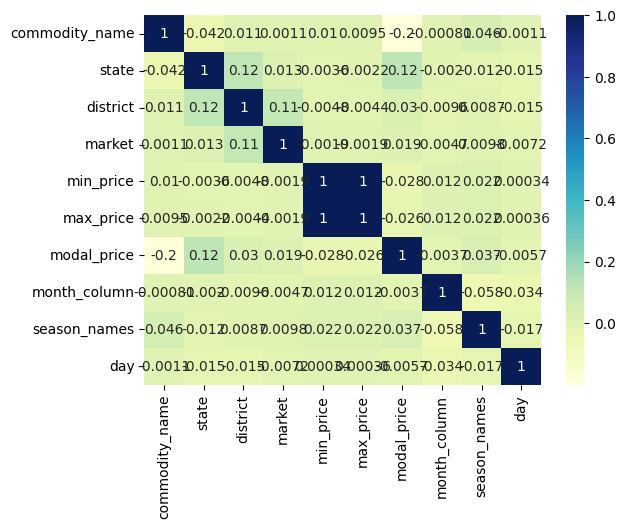

In [42]:
#print(data2.corr())
import seaborn as sns
# plotting correlation heatmap
dataplot =sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [43]:
features = data2[['commodity_name', 'state', 'district', 'market', 'month_column', 'season_names','day']]
labels = data2['modal_price']

In [44]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels,test_size =0.2,random_state =2)

In [45]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
regr = RandomForestRegressor(max_depth=500, random_state=None)
regr.fit(Xtrain,Ytrain)

RandomForestRegressor(max_depth=500)

In [47]:
Xtest[0:1]

,commodity_name,state,district,market,month_column,season_names,day
695061,12,5,59,650,0,2,2


In [48]:
y_pred=regr.predict(Xtest)

In [49]:
print(r2_score(Ytest, y_pred)*100,'%')

87.76638992822583 %


In [50]:
user_input=[[156,18,194,1512,2,1,2]]
regr.predict(user_input)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([53.0259006])

In [51]:
from sklearn.metrics import mean_absolute_error

# Predict on the test set
Ypred = regr.predict(Xtest)

# Compute Mean Absolute Error
mae = mean_absolute_error(Ytest, Ypred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 3.6373169632289097


In [52]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
Ypred = regr.predict(Xtest)

# Compute Mean Squared Error
mse = mean_squared_error(Ytest, Ypred)
print("Mean Squared Error:", mse)


Mean Squared Error: 41.82164728713833


In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict on the test set
Ypred = regr.predict(Xtest)

# Compute Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(Ytest, Ypred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 6.466965848613887
